## import pandas as pd 
import numpy as np

In [8]:
df = pd.read_csv('spams.csv',encoding="ISO-8859-1")

In [6]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2528,ham,jay says he'll put in &lt;#&gt;,NaN,NaN,NaN
157,ham,"Hello, my love. What are you doing? Did you ge...",NaN,NaN,NaN
4022,ham,Well. Balls. Time to make calls,NaN,NaN,NaN
3914,ham,Ard 530 lor. I ok then message Ì_ lor.,NaN,NaN,NaN
3458,spam,Not heard from U4 a while. Call me now am here...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [ ]:
## 1.Data Cleaning 
## 2.EDA 
## 3.Text preprocessing
## 4.model building 
## 5.Evaluation 
## 6 Improvments 
## 7 Websites 
## 8 Deployment 

# 1. Data Cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
## drop last 3 columns::
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [14]:
df.sample(5)

,v1,v2
1020,ham,Good afternoon on this glorious anniversary da...
1307,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
1131,ham,"Sorry, I'll call later"
5289,ham,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
3451,ham,Ugh just got outta class


In [15]:
## Renaming the columns::
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [16]:
df.sample(5)

,target,text
1858,ham,"Sir, i am waiting for your call."
4730,ham,K:)eng rocking in ashes:)
1905,ham,"There're some people by mu, I'm at the table b..."
1475,ham,Nice. Wait...should you be texting right now? ...
3826,spam,Congratulations U can claim 2 VIP row A Ticket...


In [17]:
## label Encoder ::
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
df['target']=encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
## missing values ::
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
## check for Duplicate Values ::
df.duplicated().sum()

403

In [24]:
df.shape

(5572, 2)

In [23]:
## remove the Duplicated ::
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [25]:
df=df.drop_duplicates(keep='first')

In [26]:
df.shape

(5169, 2)

## 2 Exploratory Data Analysis ::

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

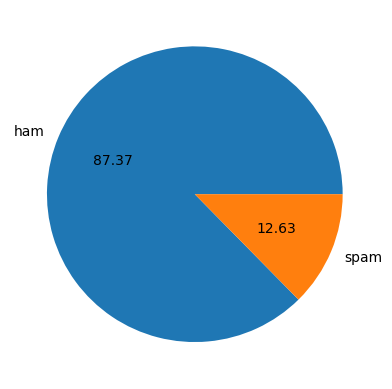

In [34]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f");

In [ ]:
## Data is imbalanced here 

In [35]:
import nltk 

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
### length of Number of characters used:: 
df['num_characters']=df['text'].apply(len)

C:\Users\abhis\AppData\Local\Temp\ipykernel_24416\1582532214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [40]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
## Number of words 
df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [43]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\abhis\AppData\Local\Temp\ipykernel_24416\2256490802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [44]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [46]:
# Num of sentences 
df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [47]:
# Num of sentences 
df['Num_Sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\abhis\AppData\Local\Temp\ipykernel_24416\753084497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [49]:
df.describe()

,target,num_characters,num_words,Num_Sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [53]:
### ham messages ###
df[df['target']==0].head(2)

,target,text,num_characters,num_words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [54]:
df[df['target']==0].describe()

,target,num_characters,num_words,Num_Sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [55]:
### Describe spam message 
df[df['target']==1].describe()

,target,num_characters,num_words,Num_Sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [56]:
### Ploting Classes Histogram 
import seaborn as sns 

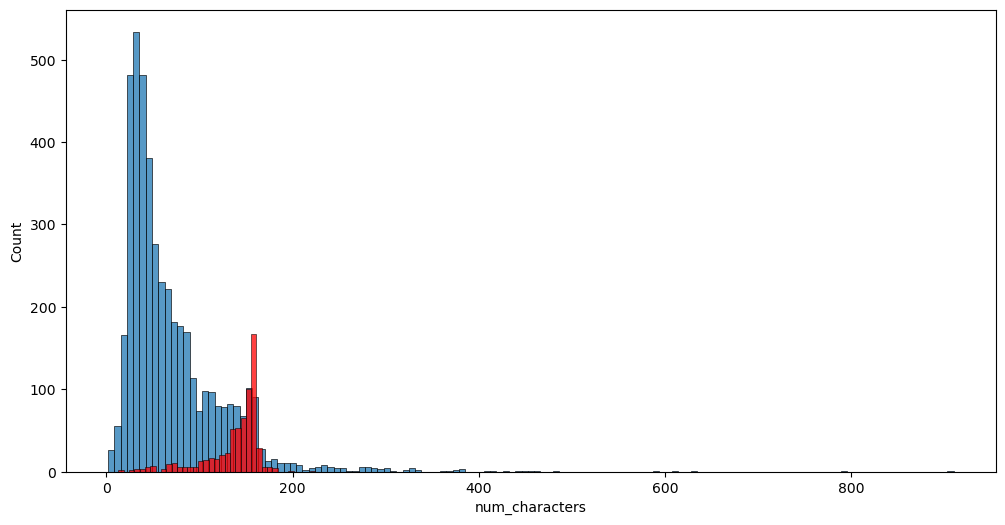

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(df.query('target==0')['num_characters'])
sns.histplot(df.query('target==1')['num_characters'],color='red');

#comments : The number of characters used in the Ham messages are less compared to Number of characters used in Spam message(Red) more concentrated on the 150-200 range


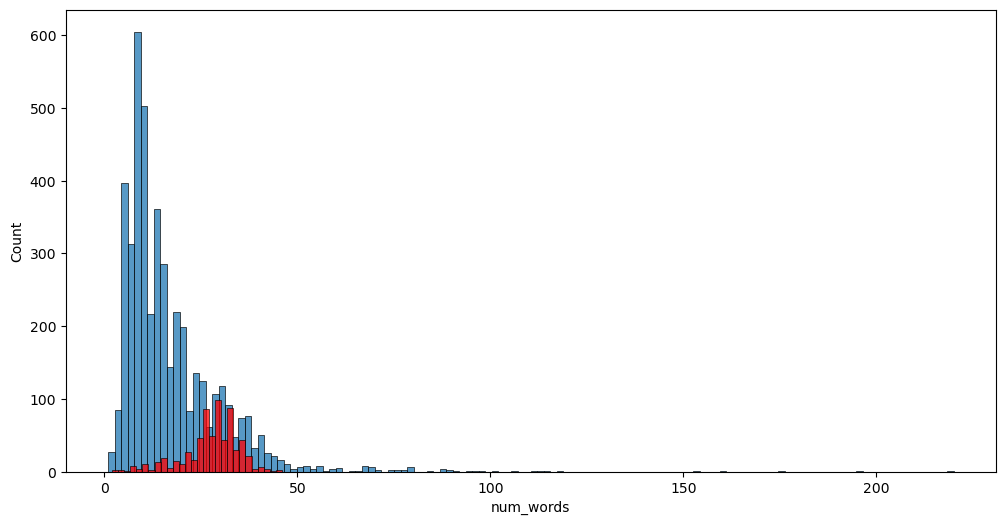

In [62]:
## Histogram for Number of Words 
plt.figure(figsize=(12,6))
sns.histplot(df.query('target==0')['num_words'])
sns.histplot(df.query('target==1')['num_words'],color='red');

#comments : The number of words used in the Ham messages are less compared to Number of characters used in Spam message(Red) more concentrated on the 30-40 range

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


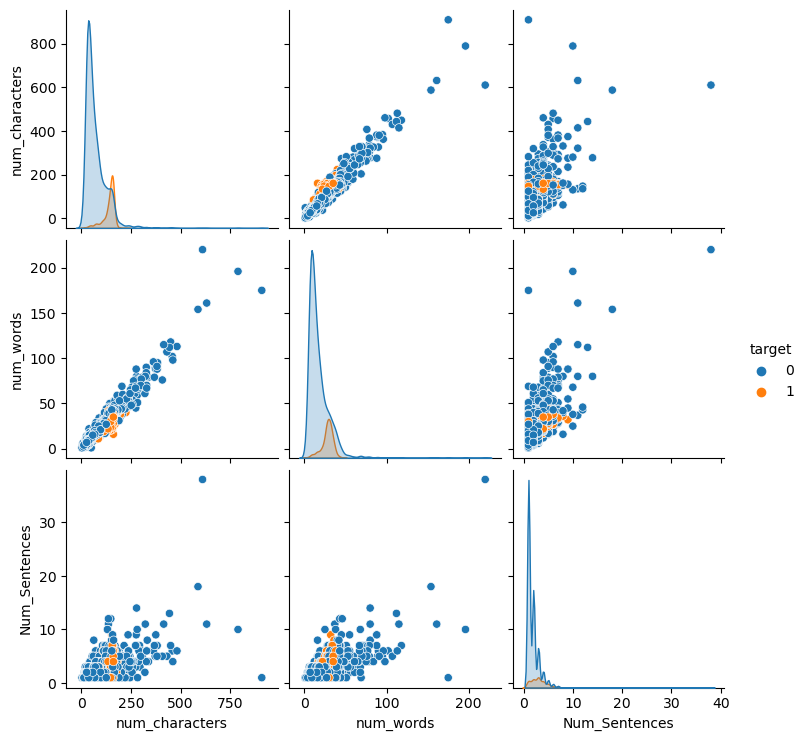

In [64]:
## Correlation between each columns 
sns.pairplot(df,hue='target');

In [73]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

In [74]:
newdf.corr()

,target,num_characters,num_words,Num_Sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
Num_Sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

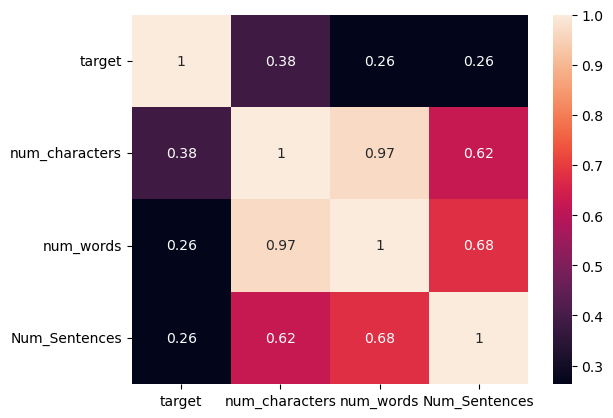

In [76]:
sns.heatmap(newdf.corr(),annot=True)

#comments : num_characters has strong correlation with the target columns as shown 

# 3. Data Preprocessing 
lowercase
Tokenization 
removing special characters
removing stop words and punctuation 
Stemming 

In [86]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    return y

In [87]:
transform_text('HI # &  HOW ARE YOU &')

['hi', 'how', 'are', 'you']

In [84]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [92]:
import nltk
from nltk.corpus import stopwords

In [94]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [95]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
              y.append(i) 
      
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                
    return " ".join(y)


In [109]:
transform_text('#$Hi how are* you ? and wow !')

['hi', 'wow']

In [111]:
transform_text('Did you like my presentation on ML?')

['like', 'presentation', 'ml']

In [112]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [118]:
transform_text('I Loved the youtube lectures on Machine Learing , how about you ?')


['love', 'youtub', 'lectur', 'machin', 'lear']

In [124]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [125]:
df['transformed_text']=df['text'].apply(transform_text)

In [126]:
df.head(1)

,target,text,num_characters,num_words,Num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [129]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 825.8 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [138]:
## word Cloud of spam messages ::
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [139]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

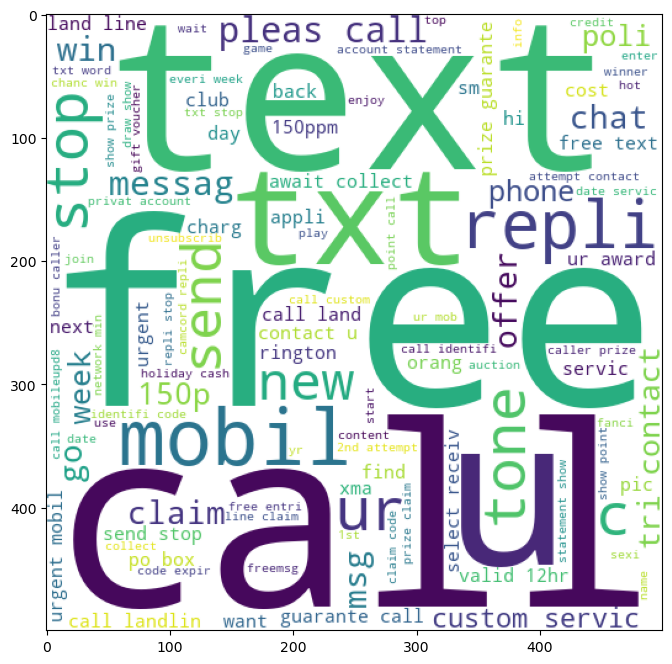

In [142]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc);

In [143]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

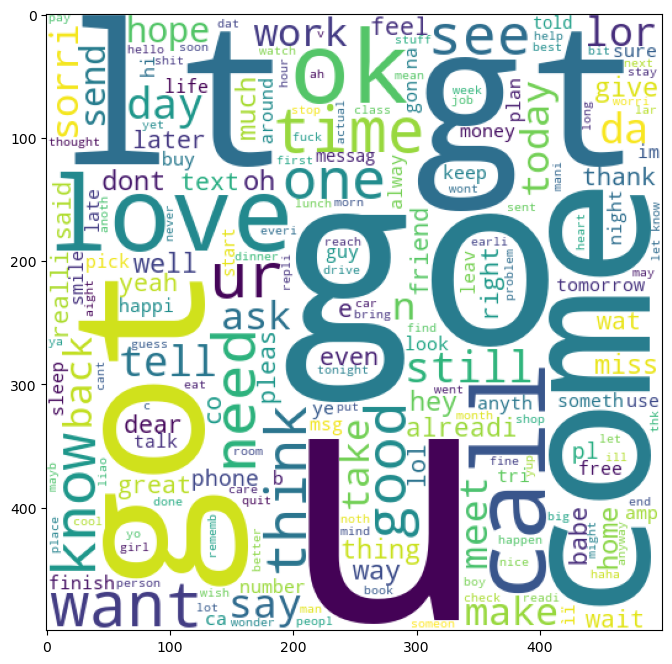

In [144]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc);

In [148]:
## top 5 words in Spam and Ham messages 
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [150]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
    

In [151]:
len(spam_corpus)

9939

In [167]:
from collections import Counter
dt=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [174]:
dt

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


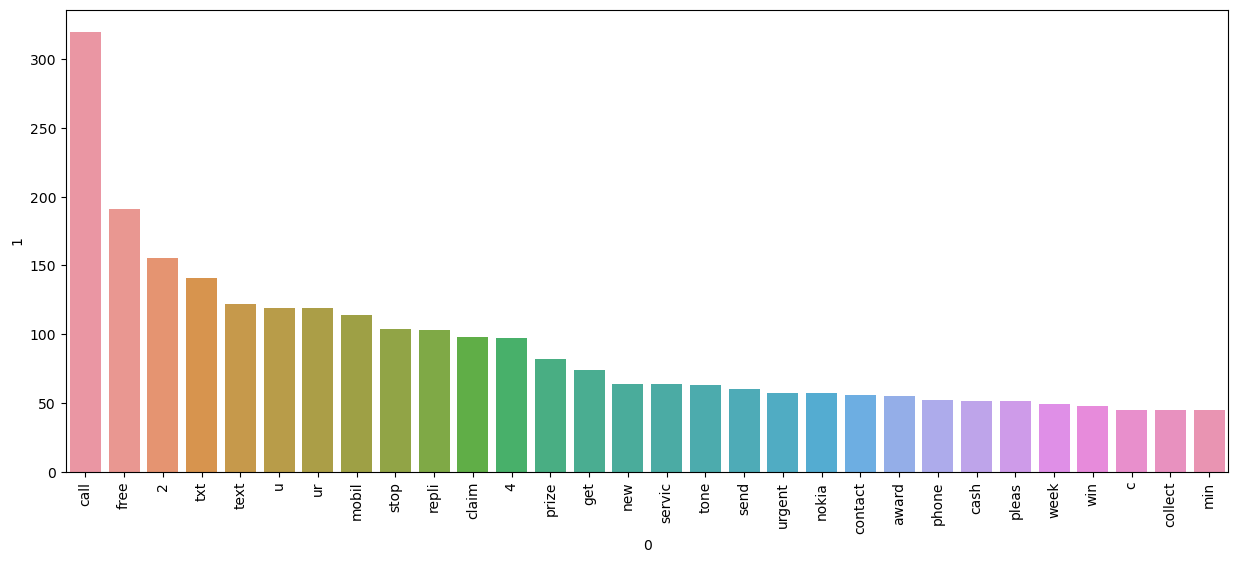

In [183]:
plt.figure(figsize=(15,6))
sns.barplot(dt, x=0, y=1)
plt.xticks(rotation='vertical');

In [184]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [185]:
dtt=pd.DataFrame(Counter(ham_corpus).most_common(30))

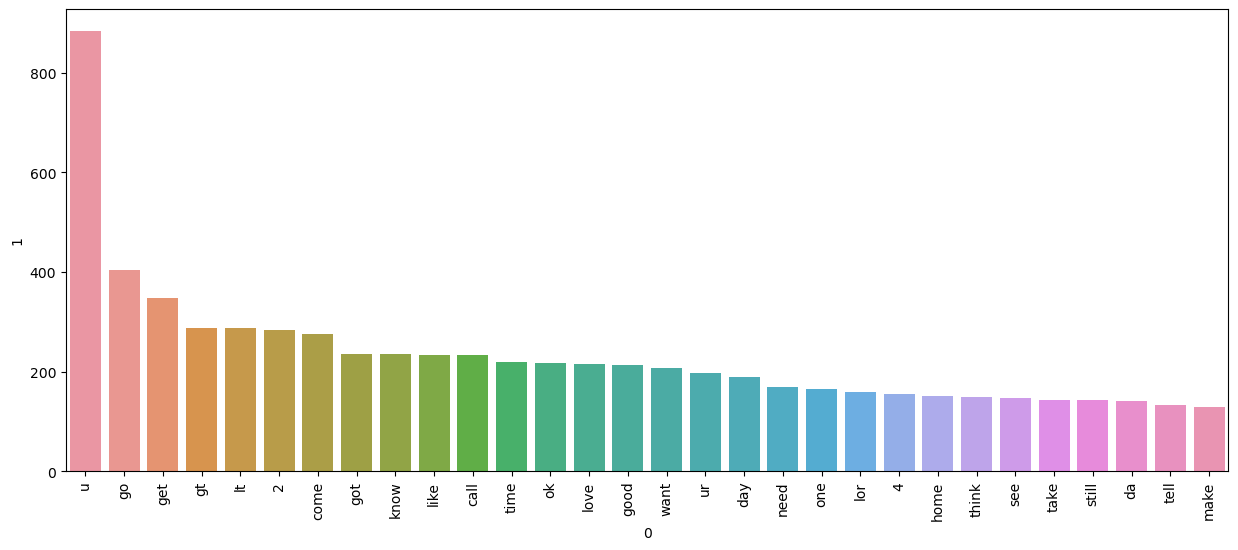

In [186]:
plt.figure(figsize=(15,6))
sns.barplot(dtt, x=0, y=1)
plt.xticks(rotation='vertical');

## 4 Model building 

In [ ]:
## Naive base 

In [242]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cd=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [250]:
X=cd.fit_transform(df['transformed_text']).toarray()

In [251]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [252]:
X.shape

(5169, 6708)

In [253]:
 y=df['target'].values

In [254]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [311]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [312]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [316]:
X_train=mm.fit_transform(X_train)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [322]:
X_test=mm.transform(X_test)
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [256]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [257]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [258]:
gb.fit(X_train,y_train)
y_pred1=gb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.8684719535783365
[[772  19]
 [117 126]]
0.8689655172413793


In [259]:
mb.fit(X_train,y_train)
y_pred2=mb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9738878143133463
[[872  10]
 [ 17 135]]
0.9310344827586207


In [260]:
bb.fit(X_train,y_train)
y_pred3=bb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9661508704061895
[[885  31]
 [  4 114]]
0.7862068965517242


In [263]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 581.0 kB/s eta 0:02:52
   ---------------------------------------- 0.1/99.8 MB 652.5 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.8 MB 655.4 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 620.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.8 MB 654.2 kB/s eta 0:02:33
   --------------------

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [277]:
svc =SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [279]:
clfs ={
'svc' :svc,
'knc' : knc,
'mnb': mnb,
'dtc': dtc,
'lrc':lrc,
'rfc':rfc,
'abc':abc,
'bc':bc,
'etc':etc,
'gbdt':gbdt,
'xgb':xgb
}

In [280]:
clfs.items()

dict_items([('svc', SVC(gamma=1.0, kernel='sigmoid')), ('knc', KNeighborsClassifier()), ('mnb', MultinomialNB()), ('dtc', DecisionTreeClassifier(max_depth=5)), ('lrc', LogisticRegression(penalty='l1', solver='liblinear')), ('rfc', RandomForestClassifier(n_estimators=50, random_state=2)), ('abc', AdaBoostClassifier(random_state=2)), ('bc', BaggingClassifier(n_estimators=50, random_state=2)), ('etc', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('gbdt', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max

In [323]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    
    return accuracy,precision

In [271]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9323017408123792, 0.7310344827586207)

In [324]:
accuracy=[]
precision=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    accuracy.append(current_accuracy)
    precision.append(current_precision)
    

In [373]:
accuracy

[0.9216634429400387,
 0.9110251450676983,
 0.97678916827853,
 0.9245647969052224,
 0.9235976789168279,
 0.9709864603481625,
 0.9458413926499033,
 0.9535783365570599,
 0.9758220502901354,
 0.9361702127659575,
 0.9642166344294004]

In [372]:
for name,clf in clfs.items():
    print(clf)

SVC(gamma=1.0, kernel='sigmoid')
KNeighborsClassifier()
MultinomialNB()
DecisionTreeClassifier(max_depth=5)
LogisticRegression(penalty='l1', solver='liblinear')
RandomForestClassifier(n_estimators=50, random_state=2)
AdaBoostClassifier(random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(n_estimators=50, random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=

In [286]:
performance=pd.DataFrame({'Algaritms':clfs.keys(),'Accuracy':accuracy,'Precision':precision}).sort_values('Precision',ascending=False)

In [325]:
performance_scale=pd.DataFrame({'Algaritms':clfs.keys(),'Accuracy_scale':accuracy,'Precision_scale':precision}).sort_values('Precision_scale',ascending=False)

In [287]:
performance

,Algaritms,Accuracy,Precision
2,mnb,0.973888,0.931034
4,lrc,0.970986,0.841379
10,xgb,0.964217,0.827586
8,etc,0.971954,0.806897
7,bc,0.954545,0.772414
5,rfc,0.967118,0.765517
6,abc,0.945841,0.758621
0,svc,0.932302,0.731034
9,gbdt,0.934236,0.613793
3,dtc,0.923598,0.496552


In [326]:
performance_scale

,Algaritms,Accuracy_scale,Precision_scale
4,lrc,0.923598,0.944828
2,mnb,0.976789,0.910345
0,svc,0.921663,0.896552
8,etc,0.975822,0.841379
10,xgb,0.964217,0.841379
7,bc,0.953578,0.827586
5,rfc,0.970986,0.806897
6,abc,0.945841,0.758621
9,gbdt,0.936170,0.627586
3,dtc,0.924565,0.496552


In [299]:
performance_df=pd.melt(performance,id_vars='Algaritms')

In [334]:
performance_df

,Algaritms,variable,value
0,mnb,Accuracy,0.973888
1,lrc,Accuracy,0.970986
2,xgb,Accuracy,0.964217
3,etc,Accuracy,0.971954
4,bc,Accuracy,0.954545
5,rfc,Accuracy,0.967118
6,abc,Accuracy,0.945841
7,svc,Accuracy,0.932302
8,gbdt,Accuracy,0.934236
9,dtc,Accuracy,0.923598


In [327]:
performance_scale_df=pd.melt(performance_scale,id_vars='Algaritms')

In [333]:
pd.merge(performance,performance_scale, on='Algaritms')

,Algaritms,Accuracy,Precision,Accuracy_scale,Precision_scale
0,mnb,0.973888,0.931034,0.976789,0.910345
1,lrc,0.970986,0.841379,0.923598,0.944828
2,xgb,0.964217,0.827586,0.964217,0.841379
3,etc,0.971954,0.806897,0.975822,0.841379
4,bc,0.954545,0.772414,0.953578,0.827586
5,rfc,0.967118,0.765517,0.970986,0.806897
6,abc,0.945841,0.758621,0.945841,0.758621
7,svc,0.932302,0.731034,0.921663,0.896552
8,gbdt,0.934236,0.613793,0.936170,0.627586
9,dtc,0.923598,0.496552,0.924565,0.496552


C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


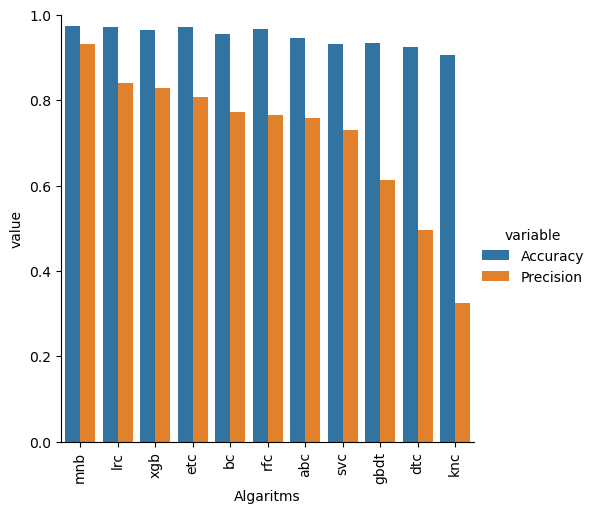

In [306]:
sns.catplot(data=performance_df,x='Algaritms',y='value',hue='variable'
           ,kind='bar',height=5);
plt.ylim(0,1.0);
plt.xticks(rotation='vertical');

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 1.0)

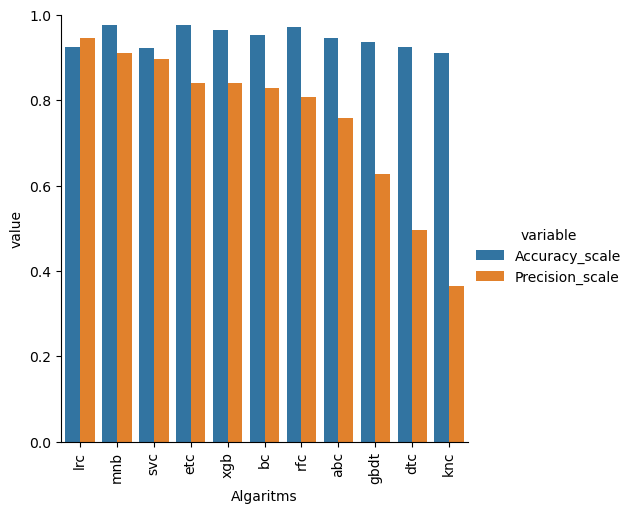

In [340]:
sns.catplot(data=performance_scale_df,x='Algaritms',y='value',hue='variable',
           kind='bar');
plt.xticks(rotation='vertical');
plt.ylim(0,1.0)

In [356]:
## Voting Classifier ## 
#lrc=LogisticRegression(solver='liblinear',penalty='l1')
mnb=MultinomialNB()
svc =SVC(kernel='sigmoid',gamma=1.0,probability=True)
from sklearn.ensemble import VotingClassifier

In [359]:
Vc=VotingClassifier(estimators=[('lrc',lrc),('mnb',mnb),('svc',svc)],voting='soft')

In [360]:
Vc.fit(X_train,y_train)

VotingClassifier(estimators=[('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('mnb', MultinomialNB()),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [361]:
Vc.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [362]:
y_predV=gb.predict(X_test)
print(accuracy_score(y_predV,y_test))
print(confusion_matrix(y_predV,y_test))
print(precision_score(y_predV,y_test))

0.8684719535783365
[[772  19]
 [117 126]]
0.8689655172413793


In [363]:
## Applying Stacking 

estimators=[('lrc',lrc),('mnb',mnb),('svc',svc)]
final_esimator=RandomForestClassifier()

In [364]:
from sklearn.ensemble import StackingClassifier

In [365]:
cl=StackingClassifier(estimators=estimators,final_estimator=final_esimator)

In [366]:
cl.fit(X_train,y_train)

StackingClassifier(estimators=[('lrc',
                                LogisticRegression(penalty='l1',
                                                   solver='liblinear')),
                               ('mnb', MultinomialNB()),
                               ('svc',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True))],
                   final_estimator=RandomForestClassifier())

In [367]:
y_predS=gb.predict(X_test)
print(accuracy_score(y_predS,y_test))
print(confusion_matrix(y_predS,y_test))
print(precision_score(y_predS,y_test))

0.8684719535783365
[[772  19]
 [117 126]]
0.8689655172413793
